In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from datetime import datetime

In [3]:
# g(r)
#r(mm) g(r)
RadialDoseFuntion = pd.DataFrame([[0.0,	1.0080	],
[5.0,	1.0000	],
[10.0,	1.0000	],
[15.0,	1.0030	],
[20.0,	1.0070	],
[25.0,	1.0080	],
[30.0,	1.0080	],
[35.0,	1.0067	],
[40.0,	1.0040	],
[45.0,	1.0002	],
[50.0,	0.9950	],
[55.0,	0.9884	],
[60.0,	0.9810	],
[65.0,	0.9732	],
[70.0,	0.9640	],
[75.0,	0.9527	],
[80.0,	0.9400	],
[85.0,	0.9268	],
[90.0,	0.9130	],
[95.0,	0.8982	],
[100.0,	0.8820],	
[105.0,	0.8639],	
[110.0,	0.8440],	
[115.0,	0.8222],	
[120.0,	0.7990],	
[125.0,	0.7743],	
[130.0,	0.7470],	
[135.0,	0.7158],	
[140.0,	0.6810]],columns=['r(mm)','g(r)'])

In [4]:
# f(r,theta)
# r(mm) 0-5-10-15-20-25-30-35-40-45-50-55-60
Anisotropy2D =pd.DataFrame([[0.0,	0.7910,	0.7950,	0.7850,	0.8370,	0.8760,	0.9083,	0.9360,	0.9442,	0.9589,	0.9694,	0.9724,	0.9780,	0.9845,	0.9897,	0.9919,	0.9894,	0.9849,	0.9861,	1.0000,	1.0058,	0.9996,	0.9930,	0.9908,	0.9893,	0.9844,	0.9775,	0.9769,	0.9736,	0.9591,	0.9460,	0.9262,	0.9061,	0.8830,	0.8330,	0.8063,	0.7976,	0.7159],	
[5.0,	  0.6670,	0.6710,	0.7270,	0.7863,	0.8360,	0.8749,	0.9040,	0.9262,	0.9433,	0.9564,	0.9672,	0.9770,	0.9849,	0.9906,	0.9949,	0.9983,	1.0009,	1.0017,	1.0000,	0.9977,	0.9959,	0.9944,	0.9925,	0.9896,	0.9848,	0.9776,	0.9678,	0.9564,	0.9432,	0.9251,	0.9024,	0.8729,	0.8324,	0.7790,	0.7100,	0.6230,	0.6090],	
[10.0,	0.6310,	0.6610,	0.7270,	0.7893,	0.8390,	0.8752,	0.9020,	0.9250,	0.9429,	0.9575,	0.9693,	0.9778,	0.9846,	0.9904,	0.9950,	0.9980,	0.9995,	1.0000,	1.0000,	1.0009,	1.0015,	1.0000,	0.9957,	0.9902,	0.9851,	0.9801,	0.9725,	0.9608,	0.9456,	0.9272,	0.9041,	0.8735,	0.8320,	0.7780,	0.7070,	0.6240,	0.5850],	
[15.0,	0.6339,	0.6751,	0.7378,	0.7981,	0.8449,	0.8796,	0.9058,	0.9264,	0.9460,	0.9601,	0.9691,	0.9773,	0.9847,	0.9910,	0.9955,	0.9979,	0.9984,	0.9986,	1.0000,	1.0018,	1.0024,	1.0006,	0.9963,	0.9910,	0.9860,	0.9810,	0.9736,	0.9621,	0.9466,	0.9284,	0.9058,	0.8765,	0.8380,	0.7862,	0.7201,	0.6461,	0.5917],	
[20.0,	0.6450,	0.6840,	0.7450,	0.8017,	0.8460,	0.8803,	0.9070,	0.9270,	0.9481,	0.9612,	0.9679,	0.9767,	0.9852,	0.9917,	0.9962,	0.9988,	0.9999,	1.0000,	1.0000,	1.0001,	0.9997,	0.9983,	0.9955,	0.9917,	0.9871,	0.9810,	0.9719,	0.9601,	0.9456,	0.9275,	0.9054,	0.8768,	0.8400,	0.7910,	0.7270,	0.6520,	0.6030],	
[25.0,	0.6535,	0.6920,	0.7516,	0.8065,	0.8492,	0.8809,	0.9066,	0.9282,	0.9492,	0.9624,	0.9696,	0.9778,	0.9854,	0.9914,	0.9957,	0.9985,	0.9999,	1.0003,	1.0000,	0.9998,	0.9995,	0.9982,	0.9956,	0.9920,	0.9875,	0.9818,	0.9740,	0.9630,	0.9487,	0.9312,	0.9093,	0.8805,	0.8433,	0.7959,	0.7341,	0.6606,	0.6130],	
[30.0,	0.6600,	0.7000,	0.7580,	0.8122,	0.8540,	0.8820,	0.9060,	0.9296,	0.9497,	0.9634,	0.9723,	0.9794,	0.9852,	0.9902,	0.9941,	0.9970,	0.9989,	0.9998,	1.0000,	1.0004,	1.0006,	0.9992,	0.9960,	0.9917,	0.9872,	0.9828,	0.9779,	0.9679,	0.9532,	0.9366,	0.9150,	0.8857,	0.8472,	0.8010,	0.7420,	0.6720,	0.6220],	
[35.0,	0.6676,	0.7084,	0.7642,	0.8175,	0.8587,	0.8837,	0.9062,	0.9303,	0.9497,	0.9636,	0.9733,	0.9797,	0.9845,	0.9885,	0.9920,	0.9951,	0.9979,	0.9996,	1.0000,	1.0005,	1.0007,	0.9992,	0.9954,	0.9908,	0.9865,	0.9831,	0.9799,	0.9708,	0.9557,	0.9394,	0.9186,	0.8893,	0.8501,	0.8055,	0.7499,	0.6822,	0.6314],	
[40.0,	0.6765,	0.7170,	0.7703,	0.8222,	0.8631,	0.8859,	0.9073,	0.9304,	0.9494,	0.9630,	0.9725,	0.9789,	0.9832,	0.9864,	0.9893,	0.9929,	0.9969,	0.9998,	1.0000,	0.9999,	0.9998,	0.9979,	0.9940,	0.9893,	0.9854,	0.9827,	0.9800,	0.9713,	0.9559,	0.9394,	0.9200,	0.8912,	0.8520,	0.8094,	0.7579,	0.6910,	0.6414],	
[45.0,	0.6862,	0.7259,	0.7762,	0.8266,	0.8674,	0.8885,	0.9090,	0.9300,	0.9488,	0.9619,	0.9705,	0.9771,	0.9814,	0.9839,	0.9862,	0.9903,	0.9959,	1.0001,	1.0000,	0.9990,	0.9982,	0.9959,	0.9918,	0.9873,	0.9840,	0.9818,	0.9789,	0.9704,	0.9545,	0.9375,	0.9199,	0.8920,	0.8533,	0.8128,	0.7659,	0.6990,	0.6517],	
[50.0,	0.6960,	0.7350,	0.7820,	0.8309,	0.8720,	0.8915,	0.9110,	0.9293,	0.9478,	0.9604,	0.9680,	0.9749,	0.9793,	0.9810,	0.9827,	0.9874,	0.9947,	1.0004,	1.0000,	0.9980,	0.9964,	0.9936,	0.9893,	0.9849,	0.9822,	0.9806,	0.9772,	0.9688,	0.9525,	0.9347,	0.9191,	0.8924,	0.8541,	0.8160,	0.7740,	0.7070,	0.6620]],
columns=['r(mm)\\theta(°)', '0',	'5',	'10',	'15',	'20',	'25',	'30',	'35',	'40',	'45',	'50',	'55',	'60',	'65',	'70',	'75',	'80',	'85',	'90',	'95',	'100',	'105',	'110',	'115',	'120',	'125',	'130',	'135',	'140',	'145',	'150',	'155',	'160',	'165',	'170',	'175',	'180']
)
Anisotropy2D = Anisotropy2D.drop('r(mm)\\theta(°)',axis=1)

In [125]:
# cGy/h/U, cGy cm2/h
DoseRateConstant = 1.1080 
#Activity Ci
Activity = 12
#Air kerma rate constant (cGy cm2/h / mCi) = 4.082

length=3.6 #mm

RAKR = 52190 # uGy/h at 1 m
CalDate = datetime(2020,11,18,13,9)
MeanLife=73.83 # dias

In [126]:
class SourceIr_192:
  """
  Class of Source Ir-192
  """
  def __init__(self, Activity,DoseRateConstant,Anisotropy2D,RadialDoseFuntion,length,RAKR,CalDate,MeanLife):
    self.Activity=Activity
    self.DoseRateConstant=DoseRateConstant
    self.Anisotropy2D=Anisotropy2D
    self.RadialDoseFuntion=RadialDoseFuntion
    self.length=length
    self.RAKR=RAKR
    self.CalDate=CalDate
    self.MeanLife=MeanLife

  def myfunc(self):
    print("Hello my name is " + self.Activity)

In [127]:
fuente=SourceIr_192(Activity=Activity,DoseRateConstant=DoseRateConstant,Anisotropy2D=Anisotropy2D,RadialDoseFuntion=RadialDoseFuntion,length=length,RAKR=RAKR,CalDate=CalDate,MeanLife=MeanLife)

In [129]:
Position=pd.DataFrame(([[0,0,0],[1,0,0],[2,0,0]]),columns=['x','y','z'])
calc_point=np.array([2,2,2])

In [123]:
PlanDate = datetime(2021,1,21,8,30)
# deltaPlanCal = (PlanDate-fuente.CalDate).days + (PlanDate-fuente.CalDate).seconds/(24*3600)
# fuente.RAKR*np.exp(-np.log(2)*deltaPlanCal/fuente.MeanLife)

def Dose_Rate(Position,calc_point,fuente,PlanDate):
    deltaPlanCal = (PlanDate-fuente.CalDate).days + (PlanDate-fuente.CalDate).seconds/(24*3600)

    Sk = fuente.RAKR*np.exp(-np.log(2)*deltaPlanCal/fuente.MeanLife)
    r = calc_point-Position
    a = pd.DataFrame([Position.loc[i,['x','y','z']] - Position.loc[i+1,['x','y','z']] if i!=len(Position)-1 else Position.loc[i-1,['x','y','z']] - Position.loc[i,['x','y','z']] for i in range(len(Position))]) 
    r_dot_a=[r.iloc[i].dot(a.iloc[i]) for i in range(len(r))]
    r['modulo_r'] = r.apply(lambda x:np.linalg.norm(x), axis='columns')
    a['modulo_a'] = a.apply(lambda x:np.linalg.norm(x), axis='columns')

    theta = [np.degrees(np.arccos(r_dot_a[i]/(r.modulo_r[i]*a.modulo_a[i]))) for i in range(len(r_dot_a))]

    a_norm = a[['x','y','z']].apply(lambda x:x/np.linalg.norm(x), axis='columns')

    r1 = calc_point - (Position - a_norm*fuente.length/20)
    r1_dot_a=[r1.iloc[i].dot(a[['x','y','z']].iloc[i]) for i in range(len(r1))]
    r1['modulo_r1'] = r1.apply(lambda x:np.linalg.norm(x), axis='columns')
    theta_1 = np.array([np.degrees(np.arccos(r1_dot_a[i]/(r1.modulo_r1[i]*a.modulo_a[i]))) for i in range(len(r1_dot_a))])

    r2 = calc_point - (Position + a_norm*fuente.length/20)
    r2_dot_a=[r2.iloc[i].dot(a[['x','y','z']].iloc[i]) for i in range(len(r2))]
    r2['modulo_r2'] = r2.apply(lambda x:np.linalg.norm(x), axis='columns')
    theta_2 = np.array([np.degrees(np.arccos(r2_dot_a[i]/(r2.modulo_r2[i]*a.modulo_a[i]))) for i in range(len(r2_dot_a))])

    beta = np.radians(theta_2 - theta_1)

    GL0 = 2*np.arctan(fuente.length/20)/(fuente.length/10)
    GL_r_th = np.array([1/(r.modulo_r[i]**2-(fuente.length/20)**2) if (theta[i]==0 or theta[i]==180) else beta[i]/((fuente.length/10)*r.modulo_r[i]*np.sin(np.radians(theta[i]))) for i in range(len(beta))])

    g_r = np.interp(r.modulo_r*10,RadialDoseFuntion['r(mm)'],RadialDoseFuntion['g(r)'])

    x,y = np.meshgrid(np.linspace(0,180,37),np.linspace(0,50,11))
    # Anisotropy2D.drop('r(mm)\\theta(°)',axis=1)
    f = interpolate.interp2d(x,y,np.array(Anisotropy2D),kind='cubic')

    F_r_th = np.array([(f(theta[i],r.modulo_r[i]*10))[0] for i in range(len(r))])
    
    return Sk*DoseRateConstant*(GL_r_th/GL0)*g_r*F_r_th.T

In [150]:
def Dose(Catheters, Calc_Matrix, fuente, PlanDate):
    DoseperMatrix=[]
    for calc_point in Calc_Matrix:
        DoseperCatheter=[]
        for Position in Catheters:
            DoseRate=Dose_Rate(Position[['x','y','z']],calc_point,fuente,PlanDate)
            DoseperDwell = DoseRate*np.array(Position['time']/3600)
            DoseperCatheter.append(DoseperDwell.sum())
        DoseperCatheter = np.array(DoseperCatheter)
        DoseperMatrix.append(DoseperCatheter.sum())
    return DoseperMatrix

In [210]:
Calc_Matrix=[np.array([i,j,k]) for i in np.linspace(-5,5,100) for j in np.linspace(-5,5,100) for k in np.linspace(-5,5,100)]
Dosis = Dose([Catheter1,Catheter2],Calc_Matrix,fuente,PlanDate)

/home/jaimeh94/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=37,17 m=407 fp=0.000002 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


KeyboardInterrupt: 

In [211]:
Dosis

[249.29012470702128,
 431.416081605342,
 838.6820866127395,
 1570.3109992413292,
 1300.8362253908963,
 226.68006956722468,
 364.6699475095986,
 596.4719634668036,
 982.0498863886578,
 1248.6230167567362,
 176.48342205534613,
 288.2681412825423,
 457.4416871363885,
 803.0301882377848,
 1430.297508804318,
 160.13707706218707,
 222.62473617643374,
 335.3904178144663,
 581.0164683402346,
 1185.8815185198903,
 128.2121108049961,
 172.1538728393172,
 253.0331180812574,
 378.6435074714709,
 620.5952910265091,
 266.00235114481217,
 484.30239237720866,
 968.4584397290168,
 3108.3553756411625,
 1813.8442331162034,
 243.79925323462473,
 394.7759536604742,
 668.1204672847844,
 1287.648628113825,
 2325.3281490957247,
 183.9334751673175,
 310.73951813727194,
 501.1141969557146,
 1004.4785655895619,
 3151.052877103658,
 169.79656855101967,
 233.24655636985992,
 360.87253306951084,
 670.7994759064659,
 2068.850968343324,
 135.65177167115968,
 178.08493069623796,
 266.38663817202576,
 414.3189962423533

In [164]:
grafica = pd.DataFrame(Calc_Matrix,columns=['x','y','z'])
grafica['Dose'] = Dosis
grafica

,x,y,z,Dose
0,-2.0,-2.0,-2.0,249.290125
1,-2.0,-2.0,-1.0,431.416082
2,-2.0,-2.0,0.0,838.682087
3,-2.0,-2.0,1.0,1570.310999
4,-2.0,-2.0,2.0,1300.836225
...,...,...,...,...
120,2.0,2.0,-2.0,105.647173
121,2.0,2.0,-1.0,110.394349
122,2.0,2.0,0.0,149.490779
123,2.0,2.0,1.0,171.986722


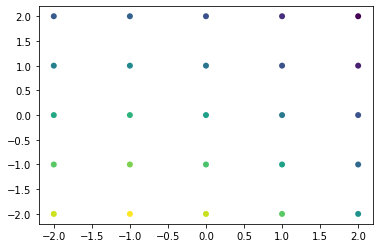

In [209]:
# import matplotlib
# # grafica[grafica.z == 0]
# # plt.contour(grafica[grafica.z == 0].x,grafica[grafica.z == 0].y,grafica[grafica.z == 0].Dose)
fig, ax = plt.subplots()
ax.scatter(grafica[grafica.z == 0].x,grafica[grafica.z == 0].y,c=grafica[grafica.z == 0].Dose,edgecolors='none', norm=matplotlib.colors.LogNorm())
# # plt.scatter(x, y, c=z,edgecolors='none', norm=matplotlib.colors.LogNorm())
# plt.pcolormesh?
# np.meshgrid?
# xi.tolist()

# interpolate.griddata?
# zi = interpolate.griddata((x,y),z,(xi,yi),method='linear')
# zi

TypeError: pcolormesh() takes 1 or 3 positional arguments but 2 were given

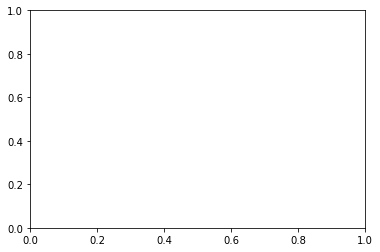

In [208]:
x = grafica[grafica.z == 0].x
y = grafica[grafica.z == 0].y
z = grafica[grafica.z == 0].Dose

# define grid.
xi = np.linspace(np.min(x),np.max(x),100)
yi = np.linspace(np.min(y),np.max(y),100)

# grid the data.
zi = interpolate.griddata((x,y),z,(xi,yi),method='linear')

grid_z2 = griddata((x,y), z, (grid_x, grid_y), method='cubic')

#pcolormesh of interpolated uniform grid with log colormap
plt.pcolormesh([grid_x, grid_y],grid_z2,norm=matplotlib.colors.LogNorm())

plt.colormap()
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

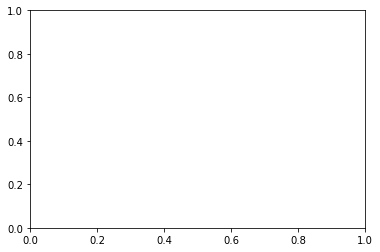

In [193]:
plt.pcolormesh(zi)

In [139]:
PlanDate = datetime(2021,1,21,8,30)

Catheter1 = pd.DataFrame([[4.4, -35.9, 17.0, 47.5],
[5.0, -34.2, 12.6, 47.5],
[3.1, -32.9, 8.2, 47.5],
[-19.3, -32.2, 8.7, 47.5],
[-20.1, -33.5, 13.3, 47.5],
[-19.7, -35.6, 17., 22.8]],columns=['x','y','z','time'])
Catheter1[['x','y','z']] = Catheter1[['x','y','z']]/10

Catheter2 = pd.DataFrame([[-12.8, 14.1, 26.7, 47.5],
[-12.8, 5.1, 22.3, 47.5],
[-12.2, -4.4, 19.4, 47.5],
[-12.0, -14.0, 16.6, 18.5],
[-11.8, -23.1, 12.6, 47.5],
[-10.4, -32.6, 10.0, 17.6],
[-10.7, -42.3, 8.2, 17.6]],columns=['x','y','z','time'])
Catheter2[['x','y','z']] = Catheter2[['x','y','z']]/10

calc_point = np.array([2,2,0])

Dose=[]
for pos in [Catheter1,Catheter2]:
    DR = Dose_Rate(pos[['x','y','z']],calc_point,fuente,PlanDate)
    print(DR)
    D = DR*np.array(pos['time']/3600)
    print(D)
    Dose.append(D.sum())
    print(Dose)
Dosis = sum(Dose)
print(Dosis)

[842.19902673 941.45859693 991.09950392 704.00034311 654.35298215
 609.58012553]
[11.11234827 12.42202315 13.07700734  9.28889342  8.63382407  3.86067413]
[58.394770381015064]
[1761.71661414 1788.50003439 1574.85289647  671.8899432  1018.96363122
  768.66544071  576.45340528]
[23.24487199 23.59826434 20.77930905  3.45276776 13.44465902  3.75791993
  2.81821665]
[58.394770381015064, 91.09600875258211]
149.4907791335972


In [136]:
DR = Dose_Rate(Catheter1[['x','y','z']],calc_point,fuente,PlanDate)

In [137]:
DR * np.array(Catheter1['time'])/3600

array([11.11234827, 12.42202315, 13.07700734,  9.28889342,  8.63382407,
        3.86067413])

In [121]:
Dosis 

149.4907791335972

In [138]:
Position=pd.DataFrame(([[0,0,0],[1,0,0],[2,0,0]]),columns=['x','y','z'])
calc_point=np.array([2,2,2])
DR = Dose_Rate(Position,calc_point,fuente,PlanDate)
DR/3600

array([0.73573157, 0.99462794, 1.12218342])

In [143]:
Catheter2

,x,y,z,time
0,-1.28,1.41,2.67,47.5
1,-1.28,0.51,2.23,47.5
2,-1.22,-0.44,1.94,47.5
3,-1.20,-1.40,1.66,18.5
4,-1.18,-2.31,1.26,47.5
5,-1.04,-3.26,1.00,17.6
6,-1.07,-4.23,0.82,17.6


In [144]:
Catheter1.time.sum() + Catheter2.time.sum()

504.0

In [115]:
r = calc_point-Position
a = pd.DataFrame([Position.loc[i,['x','y','z']] - Position.loc[i+1,['x','y','z']] if i!=len(Position)-1 else Position.loc[i-1,['x','y','z']] - Position.loc[i,['x','y','z']] for i in range(len(Position))]) 
r_dot_a=[r.iloc[i].dot(a.iloc[i]) for i in range(len(r))]
r['modulo_r'] = r.apply(lambda x:np.linalg.norm(x), axis='columns')
a['modulo_a'] = a.apply(lambda x:np.linalg.norm(x), axis='columns')

theta = [np.degrees(np.arccos(r_dot_a[i]/(r.modulo_r[i]*a.modulo_a[i]))) for i in range(len(r_dot_a))]

a_norm = a[['x','y','z']].apply(lambda x:x/np.linalg.norm(x), axis='columns')

r1 = calc_point - (Position - a_norm*fuente.length/20)
r1_dot_a=[r1.iloc[i].dot(a[['x','y','z']].iloc[i]) for i in range(len(r1))]
r1['modulo_r1'] = r1.apply(lambda x:np.linalg.norm(x), axis='columns')
theta_1 = np.array([np.degrees(np.arccos(r1_dot_a[i]/(r1.modulo_r1[i]*a.modulo_a[i]))) for i in range(len(r1_dot_a))])

r2 = calc_point - (Position + a_norm*fuente.length/20)
r2_dot_a=[r2.iloc[i].dot(a[['x','y','z']].iloc[i]) for i in range(len(r2))]
r2['modulo_r2'] = r2.apply(lambda x:np.linalg.norm(x), axis='columns')
theta_2 = np.array([np.degrees(np.arccos(r2_dot_a[i]/(r2.modulo_r2[i]*a.modulo_a[i]))) for i in range(len(r2_dot_a))])

beta = np.radians(theta_2 - theta_1)

GL0 = 2*np.arctan(fuente.length/20)/(fuente.length/10)
GL_r_th = np.array([1/(r.modulo_r[i]**2-(fuente.length/20)**2) if (theta[i]==0 or theta[i]==180) else beta[i]/((fuente.length/10)*r.modulo_r[i]*np.sin(np.radians(theta[i]))) for i in range(len(beta))])

g_r = np.interp(r.modulo_r*10,RadialDoseFuntion['r(mm)'],RadialDoseFuntion['g(r)'])

x,y = np.meshgrid(np.linspace(0,180,37),np.linspace(0,50,11))
# Anisotropy2D.drop('r(mm)\\theta(°)',axis=1)
f = interpolate.interp2d(x,y,Anisotropy2D,kind='cubic')

F_r_th = np.array([(f(theta[i],r.modulo_r[i]*10))[0] for i in range(len(r))])

In [10]:
beta = np.radians(theta_2 - theta_1)
beta

array([0.08487812, 0.11306162, 0.12710781])

In [11]:
GL0 = 2*np.arctan(fuente.length/20)/(fuente.length/10)
GL0

0.9894052123955419

In [12]:
GL_r_th = np.array([1/(r.modulo_r[i]**2-(fuente.length/20)**2) if (theta[i]==0 or theta[i]==180) else beta[i]/((fuente.length/10)*r.modulo_r[i]*np.sin(np.radians(theta[i]))) for i in range(len(beta))])

In [13]:
GL_r_th

array([0.08335818, 0.111037  , 0.12483166])

In [98]:
GL_r_th/GL0

array([0.0842508 , 0.11222601, 0.12616839])

In [14]:
g_r = np.interp(r.modulo_r*10,RadialDoseFuntion['r(mm)'],RadialDoseFuntion['g(r)'])
g_r

array([1.00679334, 1.008     , 1.008     ])

In [93]:
x,y = np.meshgrid(np.linspace(0,180,37),np.linspace(0,50,11))
f = interpolate.interp2d(x,y,np.array(Anisotropy2D),kind='cubic')

In [110]:
F_r_th = np.array([(f(theta[i],r.modulo_r[i]*10))[0] for i in range(len(r))])
F_r_th.T

array([0.98296987, 0.99641856, 0.9999723 ])

In [116]:
Dose_Rate = Sk*DoseRateConstant*(GL_r_th/GL0)*g_r*F_r_th.T
Dose_Rate

array([2648.62536892, 3580.64939309, 4039.84766966])

In [117]:
Dose_Rate/3600

array([0.73572927, 0.99462483, 1.12217991])

In [ ]:
Dose(r) = Sk*DoseRateConstant*(GL_r_th/GL0)*RadialDoseFuntion(r)*Anisotropy2D(r)

In [70]:
# Sk=rakr (mGy m²/h): 28.66990
Sk = 28669.9

In [73]:
Anisotropy2D.shape

(11, 37)

In [92]:
x,y = np.meshgrid(np.linspace(0,180,37),np.linspace(0,50,11))

f = interpolate.interp2d(x,y,np.array(Anisotropy2D),kind='cubic')

In [74]:
np.meshgrid?

In [77]:
nx, ny = (3, 2)
x = np.linspace(0, nx, 4)
y = np.linspace(0, ny, 3)
xv, yv = np.meshgrid(x, y)
print(xv)

print(yv)

# xv, yv = np.meshgrid(x, y, sparse=True)  # make sparse output arrays
# xv

# yv


[[0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]]
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]]


In [87]:
r

,x,y,z,modulo_r
0,2,2,2,3.464102
1,1,2,2,3.000000
2,0,2,2,2.828427


In [109]:
[(f(theta[i],r.modulo_r[i]*10))[0] for i in range(len(r))]

[0.9829698746042657, 0.9964185589971272, 0.9999723025504144]

In [130]:
Dose_Rate(Position,calc_point,fuente,PlanDate)

array([2648.63364871, 3580.66058644, 4039.8602985 ])

In [153]:
import numpy as np

# A values
A = np.arange(0, 8)
# B values
B = np.arange(16, 24)
# The corresponding C Values, where C[n, m] corresponds to A_n, B_m
C = np.arange(8**2).reshape(8, 8)

# Creating an 3x8x8 Array
ABC = np.meshgrid(A, B) + [C,]
ABC = np.array(ABC)

print (ABC)

[[[ 0  1  2  3  4  5  6  7]
  [ 0  1  2  3  4  5  6  7]
  [ 0  1  2  3  4  5  6  7]
  [ 0  1  2  3  4  5  6  7]
  [ 0  1  2  3  4  5  6  7]
  [ 0  1  2  3  4  5  6  7]
  [ 0  1  2  3  4  5  6  7]
  [ 0  1  2  3  4  5  6  7]]

 [[16 16 16 16 16 16 16 16]
  [17 17 17 17 17 17 17 17]
  [18 18 18 18 18 18 18 18]
  [19 19 19 19 19 19 19 19]
  [20 20 20 20 20 20 20 20]
  [21 21 21 21 21 21 21 21]
  [22 22 22 22 22 22 22 22]
  [23 23 23 23 23 23 23 23]]

 [[ 0  1  2  3  4  5  6  7]
  [ 8  9 10 11 12 13 14 15]
  [16 17 18 19 20 21 22 23]
  [24 25 26 27 28 29 30 31]
  [32 33 34 35 36 37 38 39]
  [40 41 42 43 44 45 46 47]
  [48 49 50 51 52 53 54 55]
  [56 57 58 59 60 61 62 63]]]


In [154]:
np.meshgrid?

In [159]:
[np.array([i,j,k]) for i in np.linspace(-2,2,5) for j in np.linspace(-2,2,5) for k in np.linspace(-2,2,5)]

[array([-2., -2., -2.]),
 array([-2., -2., -1.]),
 array([-2., -2.,  0.]),
 array([-2., -2.,  1.]),
 array([-2., -2.,  2.]),
 array([-2., -1., -2.]),
 array([-2., -1., -1.]),
 array([-2., -1.,  0.]),
 array([-2., -1.,  1.]),
 array([-2., -1.,  2.]),
 array([-2.,  0., -2.]),
 array([-2.,  0., -1.]),
 array([-2.,  0.,  0.]),
 array([-2.,  0.,  1.]),
 array([-2.,  0.,  2.]),
 array([-2.,  1., -2.]),
 array([-2.,  1., -1.]),
 array([-2.,  1.,  0.]),
 array([-2.,  1.,  1.]),
 array([-2.,  1.,  2.]),
 array([-2.,  2., -2.]),
 array([-2.,  2., -1.]),
 array([-2.,  2.,  0.]),
 array([-2.,  2.,  1.]),
 array([-2.,  2.,  2.]),
 array([-1., -2., -2.]),
 array([-1., -2., -1.]),
 array([-1., -2.,  0.]),
 array([-1., -2.,  1.]),
 array([-1., -2.,  2.]),
 array([-1., -1., -2.]),
 array([-1., -1., -1.]),
 array([-1., -1.,  0.]),
 array([-1., -1.,  1.]),
 array([-1., -1.,  2.]),
 array([-1.,  0., -2.]),
 array([-1.,  0., -1.]),
 array([-1.,  0.,  0.]),
 array([-1.,  0.,  1.]),
 array([-1.,  0.,  2.]),


In [199]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

In [205]:
points[0]

array([0.33354222, 0.54468439])